In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 9]

In [69]:
data = pd.read_csv('pulsar_stars.csv')
data.info()
rename=['prof_mean','prof_sd','prof_kurt','prof_skew','curve_mean','curve_sd','curve_kurt','curve_skew','target']
data.columns = rename


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


target
0    16259
1     1639
dtype: int64


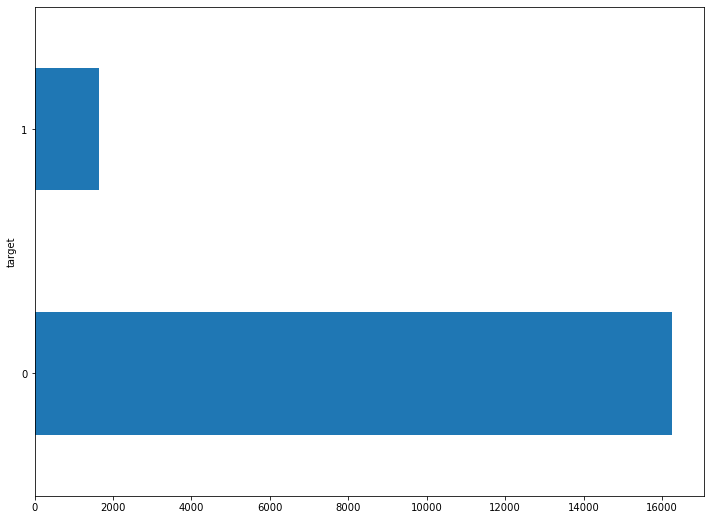

In [201]:
#size of each class
print(data.groupby(['target']).size())
data.groupby(['target']).size().plot.barh();

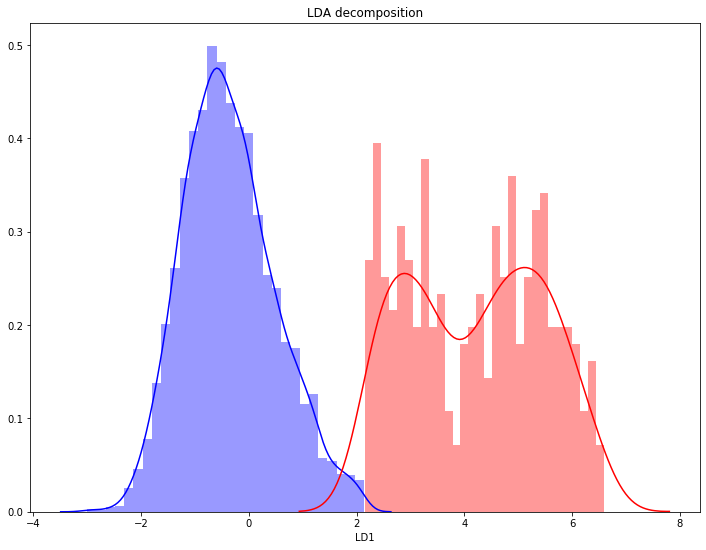

In [205]:
from sklearn.metrics import confusion_matrix as cf
    
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def plotldahist(X_train,y_train):
    
    x1=np.reshape(X_train,(-1,1))
    x2=np.reshape(y_train,(-1,1))
    df=pd.DataFrame(np.concatenate([x1,x2],axis=1),columns=['LD1','target'])
    sns.distplot( df[(df['target']==0)]['LD1'],bins=30 , color="blue").set(title='LDA decomposition')
    sns.distplot( df[(df['target']==1)]['LD1'] ,bins=30, color="red")
    
def get_conf(y_test,predictions):
    cf_matrix = cf(y_true=y_test,y_pred=predictions)
    print('accuracy: ',sum(np.diag(cf_matrix))/sum(sum(cf_matrix)))
    return pd.DataFrame(cf_matrix)

lda = Pipeline([
    ('reduce_dim',PCA(n_components=4)),
    ('scale',StandardScaler()),
    ('lda',LDA(n_components=1))
])
logress = Pipeline([
    ('reduce_dim',PCA(n_components=4)),
    ('scale',StandardScaler()),
    ('log_Res',LogisticRegression())])

X = data.iloc[:, 0:7].values
y = data.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lda.fit(X_train,y_train)
logress.fit(X_train,y_train)



plotldahist(lda.transform(X_test),lda.predict(X_test))

## Perfomance evaluation
Logistic regression yeilds both higher accuracy and greater precison for the minority class

accuracy:  0.9707635009310986
accuracy:  0.9731843575418995
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4926
           1       0.88      0.75      0.81       444

    accuracy                           0.97      5370
   macro avg       0.93      0.87      0.90      5370
weighted avg       0.97      0.97      0.97      5370

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.91      0.75      0.82       444

    accuracy                           0.97      5370
   macro avg       0.94      0.87      0.90      5370
weighted avg       0.97      0.97      0.97      5370



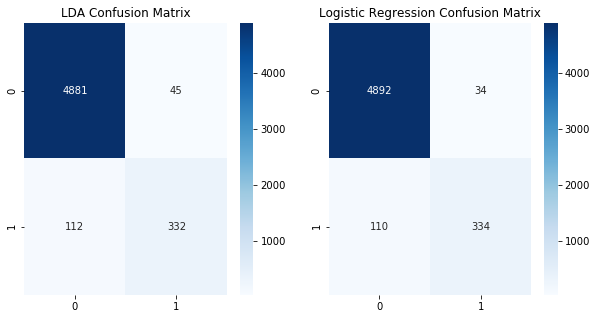

In [191]:
cf_lda=get_conf(y_test = y_test,predictions=lda.predict(X_test))
cf_logress=get_conf(y_test = y_test,predictions=logress.predict(X_test))

plt.subplot(1,2,1)
sns.heatmap(cf_lda,annot=True,fmt='d',cmap='Blues').set(title='LDA Confusion Matrix')
plt.subplot(1,2,2)
sns.heatmap(cf_logress,annot=True,fmt='d',cmap='Blues').set(title='Logistic Regression Confusion Matrix')

print(classification_report(y_true=y_test,y_pred=lda.predict(X_test)))
print(classification_report(y_true=y_test,y_pred=logress.predict(X_test)))